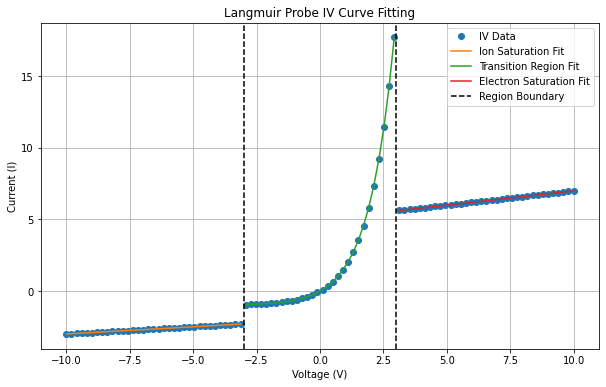

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example data: replace with your IV curve data
voltage = np.linspace(-10, 10, 100)  # Example voltage values
current = np.piecewise(
    voltage, 
    [voltage < -3, (voltage >= -3) & (voltage <= 3), voltage > 3],
    [lambda v: 0.1 * v - 2, lambda v: np.exp(v) - 1, lambda v: 0.2 * v + 5]
)

# Define fitting functions
def ion_saturation(v, a, b):
    return a * v + b

def transition_region(v, a, b, c):
    return a * np.exp(b * v) + c

def electron_saturation(v, a, b):
    return a * v + b

# Split regions based on thresholding
v_ion = voltage[voltage < -3]
i_ion = current[voltage < -3]

v_trans = voltage[(voltage >= -3) & (voltage <= 3)]
i_trans = current[(voltage >= -3) & (voltage <= 3)]

v_elec = voltage[voltage > 3]
i_elec = current[voltage > 3]

# Fit regions
popt_ion, _ = curve_fit(ion_saturation, v_ion, i_ion)
popt_trans, _ = curve_fit(transition_region, v_trans, i_trans, p0=[1, 0.5, -1])
popt_elec, _ = curve_fit(electron_saturation, v_elec, i_elec)

# Generate fit data
fit_ion = ion_saturation(v_ion, *popt_ion)
fit_trans = transition_region(v_trans, *popt_trans)
fit_elec = electron_saturation(v_elec, *popt_elec)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(voltage, current, 'o', label='IV Data')
plt.plot(v_ion, fit_ion, '-', label='Ion Saturation Fit')
plt.plot(v_trans, fit_trans, '-', label='Transition Region Fit')
plt.plot(v_elec, fit_elec, '-', label='Electron Saturation Fit')
plt.axvline(x=-3, color='k', linestyle='--', label='Region Boundary')
plt.axvline(x=3, color='k', linestyle='--')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (I)')
plt.legend()
plt.title('Langmuir Probe IV Curve Fitting')
plt.grid(True)
plt.show()